In [9]:
import os
import re
import pandas as pd
import numpy as np
import tensorflow as tf
import h5py
import pickle



import gc
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize





from textblob import TextBlob
from transformers import BertTokenizer, BertModel
from transformers import DistilBertTokenizer, DistilBertModel, TFDistilBertModel
#from transformers import TFAutoModel, AutoTokenizer




#from gensim.models import Word2Vec

import joblib
import xgboost as xgb
import nltk
import seaborn as sns
#import shap
import logging
import matplotlib.pyplot as plt



from textstat import textstat
from multiprocessing import Pool




os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('vader_lexicon')

# Set up logging
logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ismayilzadamaharram/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ismayilzadamaharram/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/ismayilzadamaharram/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
###PREPROCESSING PART

SYMBOLS_TO_ISOLATE = '.,?!-;*"…:—()%#$&_/@＼・ω+=”“[]^–>\\°<~•≠™ʊɒ∞§{}·τα❤☺ɡ|¢→̶`❥━┣┫┗Ｏ►★©―ɪ✔®\x96\x92●£♥➤´¹☕≈÷♡◐║▬′ɔː€۩۞†μ✒➥═☆ˌ◄½ʻπδηλσερνʃ✬ＳＵＰＥＲＩＴ☻±♍µº¾✓◾؟．⬅℅»Вав❣⋅¿¬♫ＣＭβ█▓▒░⇒⭐›¡₂₃❧▰▔◞▀▂▃▄▅▆▇↙γ̄″☹➡«φ⅓„✋：¥̲̅́∙‛◇✏▷❓❗¶˚˙）сиʿ✨。ɑ\x80◕！％¯−ﬂﬁ₁²ʌ¼⁴⁄₄⌠♭✘╪▶☭✭♪☔☠♂☃☎✈✌✰❆☙○‣⚓年∎ℒ▪▙☏⅛ｃａｓǀ℮¸ｗ‚∼‖ℳ❄←☼⋆ʒ⊂、⅔¨͡๏⚾⚽Φ×θ￦？（℃⏩☮⚠月✊❌⭕▸■⇌☐☑⚡☄ǫ╭∩╮，例＞ʕɐ̣Δ₀✞┈╱╲▏▕┃╰▊▋╯┳┊≥☒↑☝ɹ✅☛♩☞ＡＪＢ◔◡↓♀⬆̱ℏ\x91⠀ˤ╚↺⇤∏✾◦♬³の｜／∵∴√Ω¤☜▲↳▫‿⬇✧ｏｖｍ－２０８＇‰≤∕ˆ⚜☁'
SYMBOLS_TO_REMOVE = '\n\r\xa0\ue014\t\uf818\uf04a\xad\uf0e0\u200b\u200eعدويهصقأناخلىبمغرЕ\u202a\u202c🏻ᴍʏʀᴇɴᴅᴏᴀᴋʜᴜʟᴛᴄᴘʙғᴊᴡɢשלוםבי‼\x81エンジ故障\u2009ᴵ͞\u200fאעכחஜᴠ‐\x7fἐὶήιὲκἀίῃἴξＨ\ufeff\u2028\u3000تحكسة👮💙فزط\u2008🏾\x08‑地獄谷улкнПоАН歌舞伎הмυтѕ⤵\u200aэпрд\x95\u2002\u2004ˢᵒʳʸᴼᴷᴺʷᵗʰᵉᵘ\x13\ue602άοόςέὸתמדףנרךצט\uf0b7\uf04c\x9f\x10成都\u202d💤🍇\ue613小土豆🏡❔⁉\u202f👠》कर्मा🇹🇼🌸蔡英文🌞🎲レクサス外国人关系Сб💋💀🎄💜ьыгя不是\x9c\x9d🗑\u2005💃📣༼つ༽ḷЗз▱ц￼卖温哥华议会下降你失去所有的钱加拿大坏税骗子🐝ツ🎅\x85🍺آإشء🎵🌎͟ἔ油别克🤡й\u2003🚀🤴ʲшчИОРФДЯМюж🖑ὐύύ特殊作戦群щ💨圆明园קℐ\u200d𝓒𝓲𝓿𝓵안영하세요ЖљКћ🍀😫🤤ῦ我出生在了可以说普通话汉语好极🎼🕺🍸🥂🗽🎇🎊🆘🤠👩🖒🚪天一家⚲\u2006⚭⚆⬭⬯⏖新✀╌🇫🇷🇩🇪🇮🇬🇧😷🇨🇦ХШ🌐\x1f杀鸡给猴看ʁ𝗪𝗵𝗲𝗻𝘆𝗼𝘂𝗿𝗮𝗹𝗶𝘇𝗯𝘁𝗰𝘀𝘅𝗽𝘄𝗱📺ϖ\u2000үսᴦᎥһͺ\u2007հ\u2001ɩｙｅ൦ｌƽｈ𝐓𝐡𝐞𝐫𝐮𝐝𝐚𝐃𝐜𝐩𝐭𝐢𝐨𝐧Ƅᴨןᑯ໐ΤᏧ௦Іᴑ܁𝐬𝐰𝐲𝐛𝐦𝐯𝐑𝐙𝐣𝐇𝐂𝐘𝟎ԜТᗞ౦〔Ꭻ𝐳𝐔𝐱𝟔𝟓𝐅🐋ﬃ💘💓ё𝘥𝘯𝘶💐🌋🌄🌅𝙬𝙖𝙨𝙤𝙣𝙡𝙮𝙘𝙠𝙚𝙙𝙜𝙧𝙥𝙩𝙪𝙗𝙞𝙝𝙛👺🐷ℋ𝐀𝐥𝐪🚶𝙢Ἱ🤘ͦ💸ج패티Ｗ𝙇ᵻ👂👃ɜ🎫\uf0a7БУі🚢🚂ગુજરાતીῆ🏃𝓬𝓻𝓴𝓮𝓽𝓼☘﴾̯﴿₽\ue807𝑻𝒆𝒍𝒕𝒉𝒓𝒖𝒂𝒏𝒅𝒔𝒎𝒗𝒊👽😙\u200cЛ‒🎾👹⎌🏒⛸公寓养宠物吗🏄🐀🚑🤷操美𝒑𝒚𝒐𝑴🤙🐒欢迎来到阿拉斯ספ𝙫🐈𝒌𝙊𝙭𝙆𝙋𝙍𝘼𝙅ﷻ🦄巨收赢得白鬼愤怒要买额ẽ🚗🐳𝟏𝐟𝟖𝟑𝟕𝒄𝟗𝐠𝙄𝙃👇锟斤拷𝗢𝟳𝟱𝟬⦁マルハニチロ株式社⛷한국어ㄸㅓ니͜ʖ𝘿𝙔₵𝒩ℯ𝒾𝓁𝒶𝓉𝓇𝓊𝓃𝓈𝓅ℴ𝒻𝒽𝓀𝓌𝒸𝓎𝙏ζ𝙟𝘃𝗺𝟮𝟭𝟯𝟲👋🦊多伦🐽🎻🎹⛓🏹🍷🦆为和中友谊祝贺与其想象对法如直接问用自己猜本传教士没积唯认识基督徒曾经让相信耶稣复活死怪他但当们聊些政治题时候战胜因圣把全堂结婚孩恐惧且栗谓这样还♾🎸🤕🤒⛑🎁批判检讨🏝🦁🙋😶쥐스탱트뤼도석유가격인상이경제황을렵게만들지않록잘관리해야합다캐나에서대마초와화약금의품런성분갈때는반드시허된사용🔫👁凸ὰ💲🗯𝙈Ἄ𝒇𝒈𝒘𝒃𝑬𝑶𝕾𝖙𝖗𝖆𝖎𝖌𝖍𝖕𝖊𝖔𝖑𝖉𝖓𝖐𝖜𝖞𝖚𝖇𝕿𝖘𝖄𝖛𝖒𝖋𝖂𝕴𝖟𝖈𝕸👑🚿💡知彼百\uf005𝙀𝒛𝑲𝑳𝑾𝒋𝟒😦𝙒𝘾𝘽🏐𝘩𝘨ὼṑ𝑱𝑹𝑫𝑵𝑪🇰🇵👾ᓇᒧᔭᐃᐧᐦᑳᐨᓃᓂᑲᐸᑭᑎᓀᐣ🐄🎈🔨🐎🤞🐸💟🎰🌝🛳点击查版🍭𝑥𝑦𝑧ＮＧ👣\uf020っ🏉ф💭🎥Ξ🐴👨🤳🦍\x0b🍩𝑯𝒒𝟐🏂👳🍗🕉🐲چی𝑮𝗕𝗴🍒ꜥⲣⲏ🐑⏰鉄リ事件ї💊「」\uf203\uf09a\uf222\ue608\uf202\uf099\uf469\ue607\uf410\ue600燻製シ虚偽屁理屈Г𝑩𝑰𝒀𝑺🌤𝗳𝗜𝗙𝗦𝗧🍊ὺἈἡχῖΛ⤏🇳𝒙ψՁմեռայինրւդձ冬至ὀ𝒁🔹🤚🍎𝑷🐂💅𝘬𝘱𝘸𝘷𝘐𝘭𝘓𝘖𝘹𝘲𝘫کΒώ💢ΜΟΝΑΕ🇱♲𝝈↴💒⊘Ȼ🚴🖕🖤🥘📍👈➕🚫🎨🌑🐻𝐎𝐍𝐊𝑭🤖🎎😼🕷ｇｒｎｔｉｄｕｆｂｋ𝟰🇴🇭🇻🇲𝗞𝗭𝗘𝗤👼📉🍟🍦🌈🔭《🐊🐍\uf10aლڡ🐦\U0001f92f\U0001f92a🐡💳ἱ🙇𝗸𝗟𝗠𝗷🥜さようなら🔼'
POSITIVE_EMOJI = '😜😎😁💖😀😂😄😋👏😊👍😃😘👌🙂😉😏🎉😅👻🙃😆🤗🤓😌🤑😛🤣😝💪😗🥰😇🤠🤡🥳🥴🤩😺😸😹😻😽✌️🤟🤘'
NEGATIVE_EMOJI = '😢👎😱😳😧🙀😐😕😮😖😟😡😠😤😞😭😥😔😓😪😨😩🙁😵😒͝😣😲😯🤢َِ😰👿👿🤥😬😷🤒🤕🤯🤬🥺🙀😿😾🖕🏻🖕🏼'
NEUTRAL_EMOJI = '🐶️🍕🐵💵🔥💥🚌🌟💩💯⛽🚄🏼🚲😈🙏🎯🌹💔👊🙄⛺🍾🏽🎆🍻⏺🌏💞🚓🔔📚🏀👐🍽🎶🌺🤔🐰🐇🏈😺🌍🍔🐮🍁🍆🍑🌮🌯🤦🙈😴🆕👅👥👄🔄🔤👉👤🤧👶👲🔛🎓🏿🇺🇸🌠🐟💫💰🚬💎🐱🙆💕𝘊𝘦𝘳𝘢𝘵𝘰𝘤𝘺𝘴𝘪𝘧𝘮𝘣💗💚🐾🐕🔗🚽🏆🎃🖐🙅⛲🍰🤐👆🙌💛👀🙊🙉'
ISOLATE_DICT = {ord(c):' special symbol '.format(ord(c)) for c in SYMBOLS_TO_ISOLATE}
REMOVE_DICT = {ord(c):'' for c in SYMBOLS_TO_REMOVE}
NEUTRAL_EMOJI_DICT = {ord(c):' neutral emoji ' for c in NEUTRAL_EMOJI}
POSITIVE_EMOJI_DICT = {ord(c):' positive emoji ' for c in POSITIVE_EMOJI}
NEGATIVE_EMOJI_DICT = {ord(c):' negative emoji ' for c in NEGATIVE_EMOJI}
CONTRACTION_MAPPING = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have" }
WORDS_TO_REMOVE = ['http', 'https', 'ya']


def handle_punctuation(text):
    text = text.translate(REMOVE_DICT)
    text = text.translate(NEUTRAL_EMOJI_DICT)
    text = text.translate(POSITIVE_EMOJI_DICT)
    text = text.translate(NEGATIVE_EMOJI_DICT)
    text = text.translate(ISOLATE_DICT)
    return text

def clean_contractions(text, mapping=CONTRACTION_MAPPING):
    specials = ["’", "‘", "´", "`"]
    for s in specials:
        text = text.replace(s, "'")
    text = ' '.join([mapping[t] if t in mapping else t for t in text.split(" ")])
    return text

def text_general_reworking(text):
    spaces = ['\u200b', '\u200e', '\u202a', '\u202c', '\ufeff', '\uf0d8', '\u2061', '\x10', '\x7f', '\x9d', '\xad', '\xa0']
    for space in spaces:
        text = text.replace(space, ' ')
    text = re.sub('\s+', ' ', text)
    text = re.sub(r'\.{2,}', ' ', text)
    text = re.sub(r'(:\s?\)|:-\)|\(\s?:|\(-:|:\'\))', ' positive emoji ', text)
    text = re.sub(r'(:\s?D|:-D|x-?D|X-?D)', ' positive emoji ', text)
    text = re.sub(r'(<3|:\*)', ' positive emoji ', text)
    text = re.sub(r'(;-?\)|;-?D|\(-?;)', ' positive emoji ', text)
    text = re.sub(r'(:\s?\(|:-\(|\)\s?:|\)-:)', ' negative emoji ', text)
    text = re.sub(r'(:,\(|:\'\(|:"\()', ' negative emoji ', text)
    text = re.sub(r'((www\.[\S]+)|(https?://[\S]+))', ' link ', text)
    text = re.sub(r'\brt\b', '', text)
    text = re.sub(r'\[math\]', ' LaTex math ', text)
    text = re.sub(r'\[\/math\]', ' LaTex math ', text)
    text = re.sub(r'\\', ' LaTex ', text)
    text = re.sub(r'\brt\b', '', text)
    text = re.sub("([^\"^\'].\s)(\")([A-Z,a-z?])", r"\1\3", text)
    text = re.sub("(\')(.\")", r"\2", text)
    text = text.lower()
    if '-' in text:
        text = text.replace('-', ' - ')
    text.strip()
    return text

def preprocess_text(data):
    if pd.isna(data):
        return ""
    #Original preprocessing
    words = word_tokenize(data.lower())
    stop_words = set(stopwords.words('english'))
    filtered_words = [word for word in words if word.isalnum() and word not in stop_words]

    #Remove a particular words
    filtered_words = [word for word in filtered_words if word not in WORDS_TO_REMOVE]
    processed_text = " ".join(filtered_words)

    # Additional preprocessing steps
    processed_text = text_general_reworking(processed_text)
    processed_text = handle_punctuation(processed_text)
    processed_text = clean_contractions(processed_text)

    return processed_text

In [11]:
###COMMON FEATURES
def compute_text_length_features(df, text_column):
    df['char_count'] = df[text_column].apply(len)
    df['word_count'] = df[text_column].apply(lambda x: len(x.split()))
    df['sentence_count'] = df[text_column].apply(lambda x: len([s for s in re.split(r'[.!?]', x) if s.strip() != '']))
    df['avg_word_length'] = df['char_count'] / (df['word_count'] + 1) # avoid division by zero
    return df


def compute_sentiment_features(df, text_column):
    sia = SentimentIntensityAnalyzer()
    #df['sentiment'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.polarity)
    sentiments = df[text_column].apply(lambda  x: sia.polarity_scores(x))
    df['sentiment_neg'] = sentiments.apply(lambda x: x['neg'])
    df['sentiment_neu'] = sentiments.apply(lambda x: x['neu'])
    df['sentiment_pos'] = sentiments.apply(lambda x: x['pos'])
    df['sentiment_compound'] = sentiments.apply(lambda x: x['compound'])
    return df




def compute_lexical_diversity(df, text_column):
    df['lexical_diversity'] = df[text_column].apply(lambda x: len(set(x.split())) / (len(x.split()) + 1))
    return df

def compute_subjectivity(df, text_column):
    df['subjectivity'] = df[text_column].apply(lambda x: TextBlob(x).sentiment.subjectivity)
    return df





In [12]:


# Function to load troll data
def load_merged_data(filepath):
    try:
        df = pd.read_csv(filepath, low_memory=False)
        df['processed_content'] = df['text'].apply(preprocess_text)
        df = compute_text_length_features(df, 'processed_content')
        df = compute_sentiment_features(df, 'processed_content')

        #df = compute_word2vec_features(df, 'processed_content')
        #df = reduce_dimensionality(df, 'w2v_features')
        
        #df = compute_stylistic_features(df, 'processed_content')
        #df = compute_linguistic_features(df, 'processed_content')
        #df = compute_punctuation_features(df, 'processed_content')
        df = compute_lexical_diversity(df, 'processed_content')
        df = compute_subjectivity(df, 'processed_content')
        #df = compute_ngrams_features(df, 'processed_content')






        #CALLING EXCLUSIVE FEATURE FUNCTIONS
        #df = compute_interaction_features(df)
        #df = compute_temporal_features(df)
        
        return df
    except Exception as e:
        logging.error(f"Failed to load troll data from {filepath}: {e}")
        raise







In [13]:
###DISTILBERT NLP
def data_generator(data, batch_size):
    for start_idx in range(0, len(data), batch_size):
        end_idx = min(start_idx + batch_size, len(data))
        yield data[start_idx:end_idx]

def visualize_tsne(X_text, y=None):
    tsne = TSNE(n_components=2, random_state=42)
    X_tsne = tsne.fit_transform(X_text)  # Reduce to 2D
    
    plt.figure(figsize=(8, 6))
    if y is not None:  # If you have labels to color the points
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='coolwarm', s=10)
    else:
        plt.scatter(X_tsne[:, 0], X_tsne[:, 1], s=10)
    
    plt.colorbar()
    plt.title('t-SNE of DistilBERT Features')
    plt.xlabel('t-SNE component 1')
    plt.ylabel('t-SNE component 2')
    plt.show()

def extract_and_save_distilbert_features(data, batch_size=32, output_file='bert_features10000.h5'):
    tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
    model = TFDistilBertModel.from_pretrained('distilbert-base-uncased')
    
    with h5py.File(output_file, 'w') as hf:
        dset = hf.create_dataset("features", (len(data), 768), dtype='float32')

        for i, batch in enumerate(data_generator(data, batch_size)):
            logging.info(f'Processing batch {i + 1}/{(len(data) + batch_size - 1) // batch_size}')
            inputs = tokenizer(batch.tolist(), return_tensors='tf', padding=True, truncation=True, max_length=512)
            
            outputs = model(inputs)
            batch_features = np.mean(outputs.last_hidden_state.numpy(), axis=1)
            
            dset[i * batch_size: i * batch_size + len(batch)] = batch_features
            
            gc.collect()
    
    logging.info('Feature extraction and saving completed')

def load_bert_features(filename):
    with h5py.File(filename, 'r') as hf:
        features = hf['features'][:]
    return features

In [14]:
#PLOT

'''def plot_feature_importance(model, feature_names, top_n=20):
    importance = model.feature_importances_
    indices = np.argsort(importance)[-top_n:]

    # Debugging outputs
    logging.info(f"Feature importance values: {importance}")
    logging.info(f"Top {top_n} feature indices: {indices}")
    logging.info(f"Top {top_n} feature names: {[feature_names[i] for i in indices]}")
    
    plt.figure(figsize=(10, 6))
    plt.title('Feature Importance')
    plt.barh(range(len(indices)), importance[indices], color='b', align='center')
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel('Relative Importance')
    plt.show()'''


'def plot_feature_importance(model, feature_names, top_n=20):\n    importance = model.feature_importances_\n    indices = np.argsort(importance)[-top_n:]\n\n    # Debugging outputs\n    logging.info(f"Feature importance values: {importance}")\n    logging.info(f"Top {top_n} feature indices: {indices}")\n    logging.info(f"Top {top_n} feature names: {[feature_names[i] for i in indices]}")\n    \n    plt.figure(figsize=(10, 6))\n    plt.title(\'Feature Importance\')\n    plt.barh(range(len(indices)), importance[indices], color=\'b\', align=\'center\')\n    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])\n    plt.xlabel(\'Relative Importance\')\n    plt.show()'

In [15]:



# Vectorize text data
def vectorize_text(data):
    tfidf_vectorizer = TfidfVectorizer(max_features=10000, stop_words='english')
    X = tfidf_vectorizer.fit_transform(data)
    return X, tfidf_vectorizer

def normalize_features(df, feature_columns):
    scaler = MinMaxScaler()
    df[feature_columns] = scaler.fit_transform(df[feature_columns])
    return df, scaler


def combine_features(X_text, df, feature_columns):
    X_numerical = df[feature_columns].values
    
    if X_text.shape[0] != X_numerical.shape[0]:
        raise ValueError(f"Mismatch in number of samples: X_text has {X_text.shape[0]} samples, while X_numerical has {X_numerical.shape[0]} samples.")
    
    X = np.hstack((X_text, X_numerical))
    return X


#ANOTHER METHOD
#K-Fold cross validation
'''def train_and_evaluate(X, y):
    classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', reg_alpha=5, reg_lambda=5, max_depth=4, n_estimators=100)
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    accuracies = []
    f1_scores = []
    roc_aucs = []
    precision_scores = []
    recall_scores = []
    roc_aucs = []

    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        
        accuracies.append(accuracy_score(y_test, y_pred))
        f1_scores.append(f1_score(y_test, y_pred))
        #precision_scores.append(precision_scores(y_test, y_pred))
        roc_aucs.append(roc_auc_score(y_test, y_pred))
        recall_scores.append(recall_score(y_test, y_pred))
        roc_aucs.append(roc_auc_score(y_test, y_pred))
        
        print("Fold Results:")
        print("Accuracy:", accuracy_score(y_test, y_pred))
        print("F1 Score:", f1_score(y_test, y_pred))
        print("Precision:", precision_score(y_test, y_pred))
        print("Recall:", recall_score(y_test, y_pred))
        print("ROC AUC:", roc_auc_score(y_test, y_pred))
        print("Classification Report:\n", classification_report(y_test, y_pred))

    print("Average Accuracy:", np.mean(accuracies))
    print("Average F1 Score:", np.mean(f1_scores))
    print("Average Precision:", np.mean(precision_scores))
    print("Average Recall:", np.mean(recall_scores))
    print("Average ROC AUC:", np.mean(roc_aucs))

    return classifier'''
#K-fold without cross validation XGBOOST
def train_and_evaluate(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Init the classifier
    classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', reg_alpha=5, reg_lambda=5, max_depth=4, n_estimators=100)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test 
    y_pred = classifier.predict(X_test)
    
    # Print the metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("ROC AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()

    return classifier


#80/20
'''def train_and_evaluate(X, y):
    # Split the data into training and testing sets (80/20 split)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    # Initialize the classifier
    classifier = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', reg_alpha=5, reg_lambda=5, max_depth=4, n_estimators=100)
    
    # Train the classifier on the training set
    classifier.fit(X_train, y_train)

    # Predict on the test set
    y_pred = classifier.predict(X_test)
    
    # Evaluate the classifier
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Results on Test Set:")
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("ROC AUC:", roc_auc)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    return classifier'''


# SVM
'''def train_and_evaluate(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Init the classifier
    classifier = SVC(kernel='linear', probability=True)
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test 
    y_pred = classifier.predict(X_test)
    
    # Print the metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("ROC AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return classifier'''


#NAIVE BAYES
'''def train_and_evaluate(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Init the classifier
    classifier = GaussianNB()
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test 
    y_pred = classifier.predict(X_test)
    
    # Print the metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("ROC AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    return classifier
'''
#KNN
'''def train_and_evaluate(X, y):
    # Split the data into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
    
    # Init the classifier
    classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed
    
    # Train the classifier
    classifier.fit(X_train, y_train)
    
    # Predict on the test 
    y_pred = classifier.predict(X_test)
    
    # Print the metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)
    
    print("Accuracy:", accuracy)
    print("F1 Score:", f1)
    print("Precision:", precision)
    print("Recall:", recall)
    print("ROC AUC:", roc_auc)
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

    #Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifier.classes_)
    disp.plot(cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.show()


    return classifier
'''


'def train_and_evaluate(X, y):\n    # Split the data into training and test sets\n    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)\n    \n    # Init the classifier\n    classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed\n    \n    # Train the classifier\n    classifier.fit(X_train, y_train)\n    \n    # Predict on the test \n    y_pred = classifier.predict(X_test)\n    \n    # Print the metrics\n    accuracy = accuracy_score(y_test, y_pred)\n    f1 = f1_score(y_test, y_pred)\n    precision = precision_score(y_test, y_pred)\n    recall = recall_score(y_test, y_pred)\n    roc_auc = roc_auc_score(y_test, y_pred)\n    \n    print("Accuracy:", accuracy)\n    print("F1 Score:", f1)\n    print("Precision:", precision)\n    print("Recall:", recall)\n    print("ROC AUC:", roc_auc)\n    print("\nClassification Report:\n", classification_report(y_test, y_pred))\n\n    #Confusion Matrix\n    cm = confusi

Class distribution:
1    50000
0    50000
Name: label, dtype: int64
Accuracy: 0.87285
F1 Score: 0.8692881007453097
Precision: 0.8943416181914331
Recall: 0.8456
ROC AUC: 0.8728500000000001

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.90      0.88     10000
           1       0.89      0.85      0.87     10000

    accuracy                           0.87     20000
   macro avg       0.87      0.87      0.87     20000
weighted avg       0.87      0.87      0.87     20000



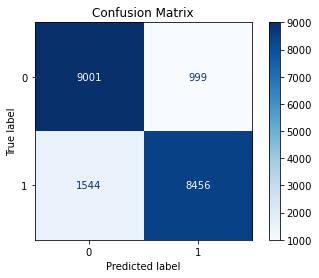

KeyboardInterrupt: 

In [16]:
# Execution block
merged_file = "../Merged_troll_non_troll/merged_dataset100000.csv"


# Load troll and non-troll datasets
combined_df = load_merged_data(merged_file)



# Investigate class distribution
print("Class distribution:")
print(combined_df['label'].value_counts())

# Define text and numerical feature columns
text_data = combined_df['processed_content']
numerical_features = ['char_count', 'word_count', 'sentence_count', 'avg_word_length',
                      'sentiment_neg', 'sentiment_neu', 'sentiment_pos', 'sentiment_compound',
                      'lexical_diversity', 'subjectivity']
assert len(text_data) == len(combined_df), "Length of text data and combined DataFrame do not match"










# Vectorize text data
#X_text, vectorizer = vectorize_text(text_data)



#X_text = extract_distilbert_features(text_data, batch_size=16)

# Extract and save DistilBERT features
#extract_and_save_distilbert_features(text_data, batch_size=32, output_file='bert_features100000.h5')

# Load DistilBERT features from disk
X_text = load_bert_features('bert_features100000.h5')

# Handle NaN values if present by filling with zeros
combined_df[numerical_features] = combined_df[numerical_features].fillna(0)


#Normalize num features
combined_df, scaler = normalize_features(combined_df, numerical_features)

#Combine text and num features
X = combine_features(X_text, combined_df, numerical_features)
y = combined_df['label'].values


classifier = train_and_evaluate(X, y)

visualize_tsne(X_text, y)

with open('xgb_model.pkl', 'wb') as model_file:
    pickle.dump(classifier, model_file)
with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)


# Since DISTILBERT features are not interpretable in the same way as other features, we skip this step for BERT features
#feature_names = [f'bert_feature_{i}' for i in range(X_text.shape[1])] + numerical_features
#plot_feature_importance(classifier, feature_names)







